In [1]:
# 6.1.4 Create Latitude and Longitude Combinations

# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# 6.2.2 The Python Requests Library

In [5]:
import requests
requests.__version__

'2.26.0'

In [ ]:
### 6.2.6 Get the City Weather Data

In [15]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [21]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

punta arenas cl
punta arenas cl
kapaa us
saskylakh ru
albany au
hansot in
kahului us
sentyabrskiy ru
bam ir
cidreira br
san vicente ph
alyangula au
carnarvon au
nanortalik gl
avarua ck
kodiak us
wakkanai jp
spencer us
ostrovnoy ru
punta arenas cl
yemtsa ru
kem ru
thompson ca
vaini to
taldan ru
westerland de
faanui pf
nanortalik gl
chimbote pe
port hardy ca
ushuaia ar
pierre us
tromso no
kapaa us
tuktoyaktuk ca
bambous virieux mu
iqaluit ca
clemencia co
rikitea pf
mataura pf
avera pf
carnarvon au
atraulia in
chuy uy
yellowknife ca
punta arenas cl
ahuimanu us
hilo us
georgetown sh
lorengau pg
saint-augustin ca
punta arenas cl
hermanus za
coahuayana mx
tasiilaq gl
kailua us
tumannyy ru
cape town za
tuktoyaktuk ca
hobart au
belushya guba ru
roebourne au
pangnirtung ca
hermanus za
hasaki jp
busselton au
albany au
karema tz
punta arenas cl
ushuaia ar
punta arenas cl
solenzo bf
sakakah sa
mataura pf
ushuaia ar
ushuaia ar
castro cl
ust-kamchatsk ru
hegang cn
rikitea pf
albany au
skelleftea se


albany au
ushuaia ar
port alfred za
bubaque gw
lata sb
karymskoye ru
longyearbyen sj
mataura pf
mar del plata ar
mys shmidta ru
dingle ie
rapu-rapu ph
ushuaia ar
georgetown sh
belushya guba ru
victoria sc
tuktoyaktuk ca
puerto ayora ec
severnoye ru
mar del plata ar
sitka us
tumannyy ru
busselton au
berlevag no
longyearbyen sj
axim gh
bluff nz
ostrovnoy ru
port alfred za
clyde river ca
albany au
santa lucia es
hobart au
samusu ws
ous ru
hithadhoo mv
mataura pf
barentsburg sj
bilma ne
miri my
jamestown sh
hermanus za
fallon us
souillac mu
hobart au
esperance au
bac lieu vn
ust-kut ru
georgetown sh
rikitea pf
burnie au
ponta do sol pt
baykit ru
avarua ck
la macarena co
san patricio mx
punta arenas cl
longyearbyen sj
souillac mu
kapaa us
atuona pf
narsaq gl
katherine au
wahpeton us
airai pw
puerto ayora ec
luderitz na
flin flon ca
tumannyy ru
hilo us
hilo us
butaritari ki
nome us
dakar sn
yumen cn
parakou bj
puerto ayora ec
ponta do sol cv
busselton au
atuona pf
mahebourg mu
butaritari ki


In [22]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

574

In [23]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [24]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [25]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
    
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass


# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------") 

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | saskylakh
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | hansot
Processing Record 6 of Set 1 | kahului
Processing Record 7 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 8 of Set 1 | bam
Processing Record 9 of Set 1 | cidreira
Processing Record 10 of Set 1 | san vicente
Processing Record 11 of Set 1 | alyangula
Processing Record 12 of Set 1 | carnarvon
Processing Record 13 of Set 1 | nanortalik
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | kodiak
Processing Record 16 of Set 1 | wakkanai
Processing Record 17 of Set 1 | spencer
Processing Record 18 of Set 1 | ostrovnoy
Processing Record 19 of Set 1 | yemtsa
Processing Record 20 of Set 1 | kem
Processing Record 21 of Set 1 | thompson
Processing Record 22 of Set 1 | vaini
Processing Record 23 of Set 1 

Processing Record 40 of Set 4 | abu jubayhah
City not found. Skipping...
Processing Record 41 of Set 4 | pevek
Processing Record 42 of Set 4 | jacareacanga
Processing Record 43 of Set 4 | baykit
Processing Record 44 of Set 4 | javanrud
Processing Record 45 of Set 4 | wanning
Processing Record 46 of Set 4 | humaita
Processing Record 47 of Set 4 | sringeri
Processing Record 48 of Set 4 | san quintin
Processing Record 49 of Set 4 | port elizabeth
Processing Record 50 of Set 4 | kargopol
Processing Record 1 of Set 5 | mandan
Processing Record 2 of Set 5 | jamestown
Processing Record 3 of Set 5 | saint-pierre
Processing Record 4 of Set 5 | grindavik
Processing Record 5 of Set 5 | la ronge
Processing Record 6 of Set 5 | krasnoselkup
Processing Record 7 of Set 5 | huazolotitlan
City not found. Skipping...
Processing Record 8 of Set 5 | ilulissat
Processing Record 9 of Set 5 | samalaeulu
City not found. Skipping...
Processing Record 10 of Set 5 | fontem
Processing Record 11 of Set 5 | salalah


Processing Record 27 of Set 8 | khed brahma
Processing Record 28 of Set 8 | svetlaya
Processing Record 29 of Set 8 | coquimbo
Processing Record 30 of Set 8 | taua
Processing Record 31 of Set 8 | maniitsoq
Processing Record 32 of Set 8 | cairns
Processing Record 33 of Set 8 | dudinka
Processing Record 34 of Set 8 | aykhal
Processing Record 35 of Set 8 | chor
Processing Record 36 of Set 8 | san ignacio
Processing Record 37 of Set 8 | port blair
Processing Record 38 of Set 8 | mikumi
Processing Record 39 of Set 8 | sabzevar
Processing Record 40 of Set 8 | vila franca do campo
Processing Record 41 of Set 8 | marawi
Processing Record 42 of Set 8 | omboue
Processing Record 43 of Set 8 | bafia
Processing Record 44 of Set 8 | graaff-reinet
Processing Record 45 of Set 8 | salinas
Processing Record 46 of Set 8 | saint-paul
Processing Record 47 of Set 8 | inta
Processing Record 48 of Set 8 | petropavlovskaya
Processing Record 49 of Set 8 | acheng
Processing Record 50 of Set 8 | afua
Processing Re

Processing Record 14 of Set 12 | phangnga
Processing Record 15 of Set 12 | svetlogorsk
Processing Record 16 of Set 12 | ostersund
Processing Record 17 of Set 12 | bereda
Processing Record 18 of Set 12 | karaul
City not found. Skipping...
Processing Record 19 of Set 12 | remedios
Processing Record 20 of Set 12 | asau
Processing Record 21 of Set 12 | le havre
Processing Record 22 of Set 12 | durazno
Processing Record 23 of Set 12 | bima
Processing Record 24 of Set 12 | itaituba
-----------------------------
Data Retrieval Complete      
-----------------------------


In [ ]:
### 6.2.7 Create a DataFrame of City Weather Data

In [26]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,50.11,76,40,25.32,CL,2022-01-27 03:39:08
1,Kapaa,22.0752,-159.3190,76.98,74,20,1.01,US,2022-01-27 03:39:08
2,Saskylakh,71.9167,114.0833,-14.46,93,46,5.44,RU,2022-01-27 03:35:24
3,Albany,42.6001,-73.9662,8.47,65,4,2.28,US,2022-01-27 03:37:26
4,Hansot,21.5833,72.8000,64.33,35,0,12.93,IN,2022-01-27 03:39:09
5,Kahului,20.8947,-156.4700,80.62,66,40,12.66,US,2022-01-27 03:39:09
6,Bam,29.1060,58.3570,53.78,31,0,2.15,IR,2022-01-27 03:39:10
7,Cidreira,-30.1811,-50.2056,74.44,95,100,6.20,BR,2022-01-27 03:39:10
8,San Vicente,-26.6167,-54.1333,69.91,97,87,2.51,AR,2022-01-27 03:39:11
9,Alyangula,-13.8483,136.4192,91.27,62,100,11.50,AU,2022-01-27 03:39:11


In [27]:
# Reorder the column order
new_column_order = ["City", "Country", "Date", "Lat","Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [28]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2022-01-27 03:39:08,-53.1500,-70.9167,50.11,76,40,25.32
1,Kapaa,US,2022-01-27 03:39:08,22.0752,-159.3190,76.98,74,20,1.01
2,Saskylakh,RU,2022-01-27 03:35:24,71.9167,114.0833,-14.46,93,46,5.44
3,Albany,US,2022-01-27 03:37:26,42.6001,-73.9662,8.47,65,4,2.28
4,Hansot,IN,2022-01-27 03:39:09,21.5833,72.8000,64.33,35,0,12.93
...,...,...,...,...,...,...,...,...,...
520,Asau,RO,2022-01-27 03:37:52,46.4333,26.4000,27.52,85,92,6.80
521,Le Havre,FR,2022-01-27 03:42:42,49.4938,0.1077,44.35,84,100,14.97
522,Durazno,UY,2022-01-27 03:42:43,-33.4131,-56.5006,64.83,83,100,19.73
523,Bima,ID,2022-01-27 03:42:43,-8.4667,118.7167,87.19,69,100,2.75


In [ ]:
## Create an output file to save the DataFrame as a CSV in a new folder for that file.

In [29]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [ ]:
## 6.3.1 Plot Latitude vs. Temperature

In [30]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [31]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1643256741.1609519

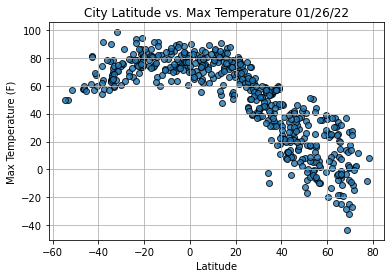

In [32]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

In [ ]:
## 6.3.2 Plot Latitude vs. Humidity

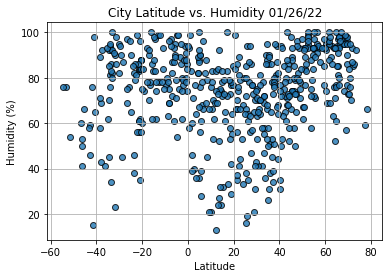

In [33]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

In [ ]:
# 6.3.3 Plot Latitude vs. Cloudiness

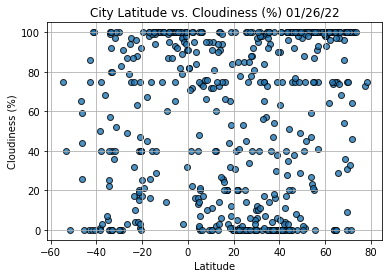

In [34]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

In [ ]:
# 6.3.4 Plot Latitude vs. Wind Speed

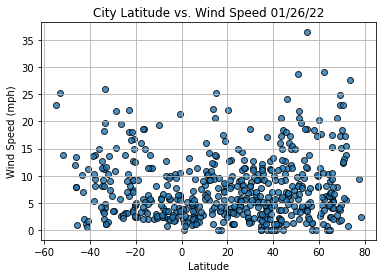

In [35]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [ ]:
## 6.4.2 Find the Correlation Between Latitude and Maximum Temperature

In [36]:
# Import linregress
from scipy.stats import linregress

In [37]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [38]:
# To create a new DataFrame from a current DataFrame, we can use the loc method on the current DataFrame

index13 = city_data_df.loc[13]
index13

City                       Kodiak
Country                        US
Date          2022-01-27 03:39:13
Lat                         57.79
Lng                     -152.4072
Max Temp                    35.11
Humidity                       87
Cloudiness                    100
Wind Speed                  18.41
Name: 13, dtype: object

In [39]:
 # Filter a DataFrame based on a value of a row.
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3       True
4       True
       ...  
520     True
521     True
522    False
523    False
524    False
Name: Lat, Length: 525, dtype: bool

In [40]:
# Return a DataFrame with all data fitting the criteria,for latitudes greater than or equal to 0
# we can use the loc method 

city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Kapaa,US,2022-01-27 03:39:08,22.0752,-159.3190,76.98,74,20,1.01
2,Saskylakh,RU,2022-01-27 03:35:24,71.9167,114.0833,-14.46,93,46,5.44
3,Albany,US,2022-01-27 03:37:26,42.6001,-73.9662,8.47,65,4,2.28
4,Hansot,IN,2022-01-27 03:39:09,21.5833,72.8000,64.33,35,0,12.93
5,Kahului,US,2022-01-27 03:39:09,20.8947,-156.4700,80.62,66,40,12.66


In [41]:
 # Create Northern and Southern Hemisphere DataFrames.
    
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

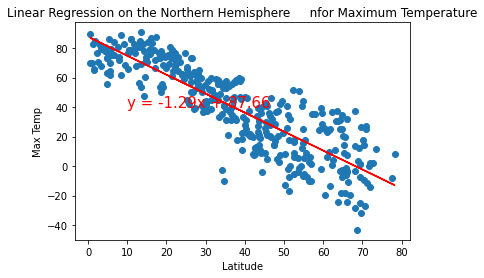

In [43]:
## Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \
    nfor Maximum Temperature', 'Max Temp',(10,40))

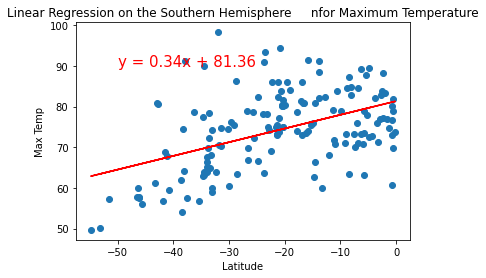

In [46]:
## Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Southern Hemisphere \
    nfor Maximum Temperature", 'Max Temp',(-50,90))

In [ ]:
# 6.4.3 Correlation Between Latitude and Percent Humidity

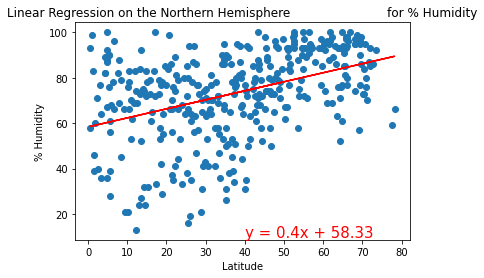

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

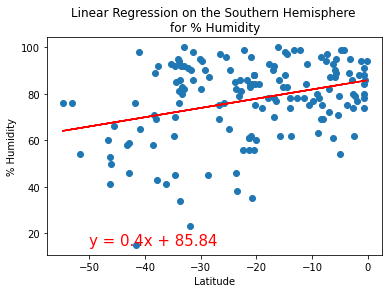

In [49]:
# linear regression line and plot of the percent humidity and latitudes for the Southern Hemisphere

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

In [ ]:
# 6.4.4 orrelation Between Latitude and Percent Cloudiness

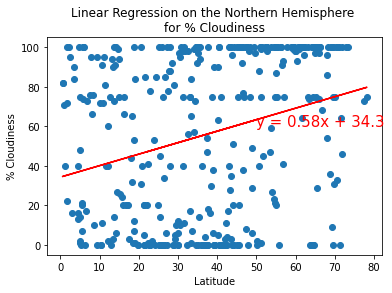

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(50,60))

In [ ]:
# 6.4.5 Correlation Between Latitude and Wind Speed

In [ ]:
# Perform Linear Regression on the Wind Speed for the Northern Hemisphere

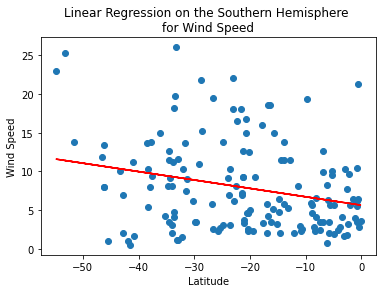

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,35))

In [ ]:
### Install the gmaps Dependency

In [58]:
conda install -c conda-forge gmaps

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

# All requested packages already installed.



In [59]:
pip install gmaps

Note: you may need to restart the kernel to use updated packages.
